In [116]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

# Discretization experiment

In [108]:
class mistery():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 5), (0, 5)]
        else:
            self.bounds = bounds
        self.min = [(2.7450, 2.3523)]
        self.fmin = 1.1743
        self.sd = sd
        self.name = 'Mistery'

    def f(self, x, offset=-40):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = 2
        term2 = 0.01*(x2 - x1**2.0)**2.0
        term3 = (1 -  x1 )** 2
        term4 = 2*(2-x2)**2
        term5 = 7*np.sin(0.5*x1)*np.sin(0.7*x1*x2)
        fval = term1 + term2 + term3 +term4 +term5
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = -np.sin(x1 - x2 -np.pi/8.0)
        # print("fval",-fval.reshape(-1, 1))
        return -fval.reshape(n,1)


X = np.random.random((100000000,2))*5
mistery_f = mistery(sd=1e-6)
Y = mistery_f.f(X)
C = mistery_f.c(X)
best_value  = np.max(Y*(C<0))

In [109]:
# X = np.random.random((10000,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])
# new_brannin_f = new_brannin(sd=1e-6)
# Y = new_brannin_f.f(X)
# C = new_brannin_f.c(X)
# cmap = (Y*(C<0)).reshape(-1)
# best_design  = X[np.argmax(cmap)]

path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_2/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    

#     print("min OC", np.min(best_value - np.array(cum_val).reshape(-1)))
#     print("best_value",best_value, "max Y", np.max(data["Y"].values*data["C_bool"].values))
#     print("X coordinates",np.array([data["X1"][np.argmax(data["Y"].values*data["C_bool"].values)],data["X2"][np.argmax(data["Y"].values*data["C_bool"].values)]]))
#     plt.scatter(X[:,0],X[:,1], c=cmap)
#     plt.scatter(best_design[0],best_design[1], color="red")
#     plt.scatter(data["X1"].values, data["X2"].values, color="magenta")
#     plt.scatter(data["X1"][np.argmax(data["Y"].values*data["C_bool"].values)],data["X2"][np.argmax(data["Y"].values*data["C_bool"].values)], color="magenta", marker="x",s=100 )
#     plt.show()
    
mean_new_branin_2 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_2 = 1.95*std_values/np.sqrt(len(files))

path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_5/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_new_branin_5 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_5 = 1.95*std_values/np.sqrt(len(files))

# path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_10/"
# files = os.listdir(path)

# #best_value = np.max(f(X))
# results_1 =[]
# for i in range(len(files)):
#     data = pd.read_csv(path+files[i])
#     cum_val = []
#     for i in range(data.values.shape[0]):
#         cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
#     results_1.append(best_value - np.array(cum_val).reshape(-1))
    
# mean_new_branin_10 = np.mean(results_1,axis=0)
# std_values = np.std(results_1,axis=0)
# MSE_new_branin_10 = 1.95*std_values/np.sqrt(len(files))

# path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_15/"
# files = os.listdir(path)

# #best_value = np.max(f(X))
# results_1 =[]
# for i in range(len(files)):
#     data = pd.read_csv(path+files[i])
#     cum_val = []
#     for i in range(data.values.shape[0]):
#         cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
#     results_1.append(best_value - np.array(cum_val).reshape(-1))
    
# mean_new_branin_15 = np.mean(results_1,axis=0)
# std_values = np.std(results_1,axis=0)
# MSE_new_branin_15 = 1.95*std_values/np.sqrt(len(files))

No handles with labels found to put in legend.


[]

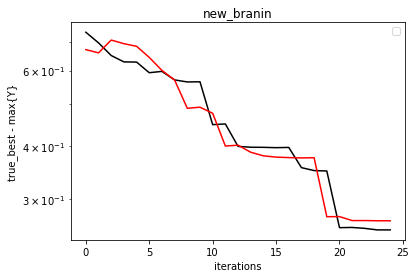

In [110]:
# plt.plot(MSE_branin[10:], color="orange")

# plt.plot(mean_new_branin_2, color="black", label="2")
plt.plot(MSE_new_branin_2[10:], color="black")
# plt.plot(mean_new_branin_2-MSE_new_branin_2, color="black")

# plt.plot(mean_new_branin_5, color="red", label="5")
plt.plot(MSE_new_branin_5[10:], color = "red")
# plt.plot(mean_new_branin_5-MSE_new_branin_5, color = "red")

# plt.plot(mean_new_branin_10, color="blue", label="10")
# plt.plot(MSE_new_branin_10[10:], color = "blue")
# plt.plot(mean_new_branin_10-MSE_new_branin_10, color = "blue")

# plt.plot(mean_new_branin_15, color="green", label="15")
# plt.plot(MSE_new_branin_15[10:], color = "green")
# plt.plot(mean_new_branin_15-MSE_new_branin_15, color = "green")

plt.yscale("log")
plt.legend()
plt.title("new_branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
# plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC.pdf')
plt.plot()


[]

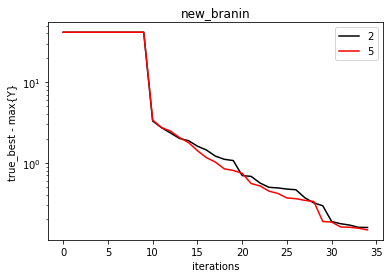

In [111]:

#plt.plot(mean_values_branin, color="orange", label="2")

plt.plot(mean_new_branin_2, color="black", label="2")
# plt.plot(mean_new_branin_2+MSE_new_branin_2, color="black")
# plt.plot(mean_new_branin_2-MSE_new_branin_2, color="black")

plt.plot(mean_new_branin_5, color="red", label="5")
# plt.plot(mean_new_branin_5+MSE_new_branin_5, color = "red")
# plt.plot(mean_new_branin_5-MSE_new_branin_5, color = "red")

# plt.plot(mean_new_branin_10, color="blue", label="10")
# plt.plot(mean_new_branin_10+MSE_new_branin_10, color = "blue")
# plt.plot(mean_new_branin_10-MSE_new_branin_10, color = "blue")

# plt.plot(mean_new_branin_15, color="green", label="15")
# plt.plot(mean_new_branin_15+MSE_new_branin_15, color = "green")
# plt.plot(mean_new_branin_15-MSE_new_branin_15, color = "green")

plt.yscale("log")
plt.legend()
plt.title("new_branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
# plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC.pdf')
plt.plot()

In [96]:
class new_brannin():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(-5, 10), (0, 15)]
        else:
            self.bounds = bounds
        self.min = [(3.26, 0.05)]
        self.fmin = 268.781
        self.sd = sd
        self.name = 'new_brannin'

    def f(self, x, offset=0):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = -(x1 - 10)**2
        term2 = -(x2 - 15)**2.0
        fval = term1 + term2
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x2 - (5.1/(4 * np.pi**2.0))*x1**2.0 + (5.0/np.pi)*x1 - 6)**2.0
        term2 = 10 * (1 - (1.0/(8*np.pi)))*np.cos(x1)
        term3 = 5
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

X = np.random.random((100000000,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])

new_brannin_f= new_brannin(sd=1e-6)
Y = new_brannin_f.f(X)
C = new_brannin_f.c(X)
best_value  = np.max(Y*(C<0))
print("best_value",best_value)

best_value 268.7871583203199


files it_36.csv
min OC 0.11714210707287975
best_value 268.78037597505863 max Y 256.64082404533923
X coordinates [2.82677225 0.67569804]


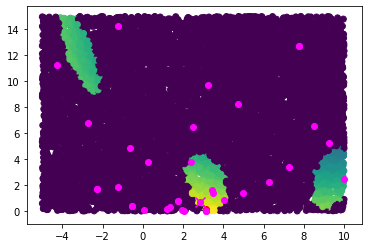

files it_17.csv
min OC 0.0365428953326159
best_value 268.78037597505863 max Y 264.12141281794015
X coordinates [3.33186586 0.17915651]


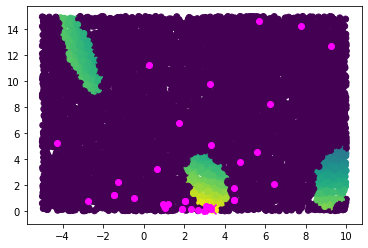

files it_22.csv
min OC 0.16247958916289917
best_value 268.78037597505863 max Y 261.0649509015099
X coordinates [3.13967037 0.37123288]


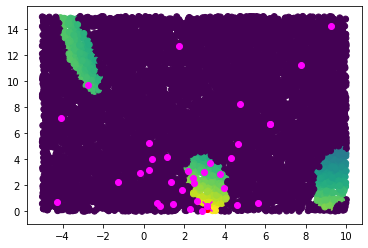

files it_23.csv
min OC 1.6329140890025542
best_value 268.78037597505863 max Y 251.57092864268
X coordinates [3.41467739 0.57070848]


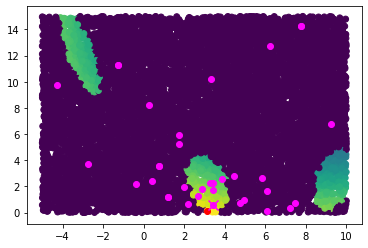

files it_4.csv
min OC 0.6943829947398399
best_value 268.78037597505863 max Y 229.67060762570912
X coordinates [3.29687627 1.40813695]


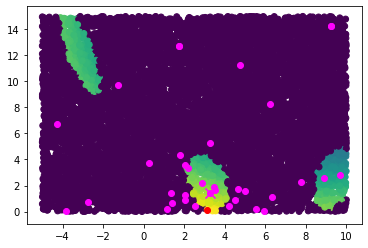

files it_2.csv
min OC 1.2674679237199484
best_value 268.78037597505863 max Y 256.2095617465961
X coordinates [2.87424954 0.6670575 ]


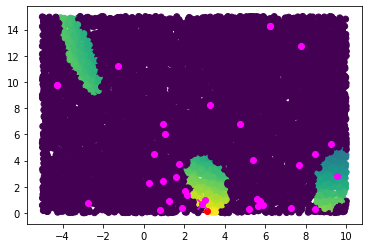

files it_1.csv
min OC 5.790684572035843
best_value 268.78037597505863 max Y 216.8285687785629
X coordinates [2.59146197 2.2743514 ]


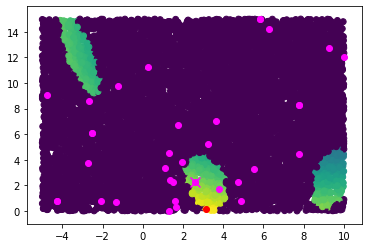

files it_15.csv
min OC 1.411731517226201
best_value 268.78037597505863 max Y 265.6797284538274
X coordinates [3.11687056 0.22494481]


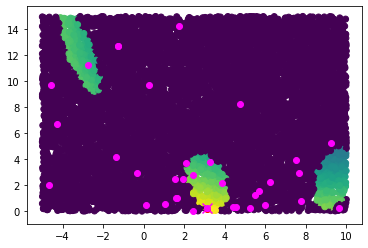

files it_14.csv
min OC 0.7576407653173192
best_value 268.78037597505863 max Y 255.65811689711063
X coordinates [3.05636516 0.59708177]


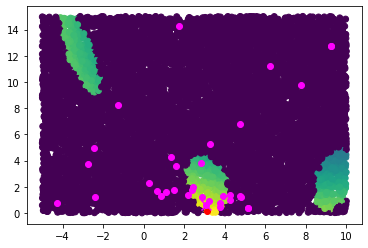

files it_24.csv
min OC 0.16501728114070602
best_value 268.78037597505863 max Y 262.84446164394575
X coordinates [3.1849953  0.28945371]


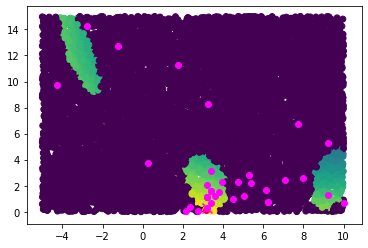

files it_39.csv
min OC 0.032345111441372865
best_value 268.78037597505863 max Y 267.40843220863417
X coordinates [3.24046559 0.10983125]


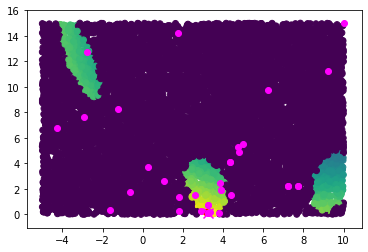

files it_26.csv
min OC 4.047186142899818
best_value 268.78037597505863 max Y 239.23224663020864
X coordinates [3.68919459 0.87888176]


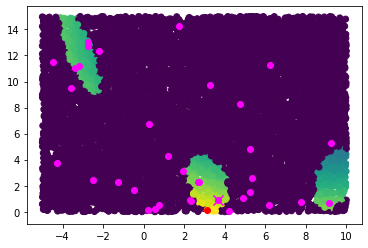

files it_10.csv
min OC 0.17454970448670792
best_value 268.78037597505863 max Y 263.45256839864936
X coordinates [3.20150166 0.2611741 ]


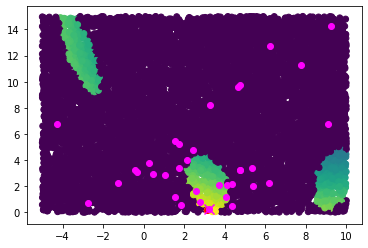

files it_37.csv
min OC 0.5257395324504728
best_value 268.78037597505863 max Y 256.7911077241256
X coordinates [3.14548083 0.51529511]


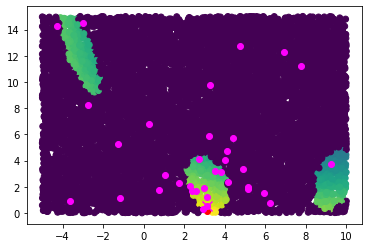

files it_8.csv
min OC 0.2957397992872757
best_value 268.78037597505863 max Y 260.91918426103643
X coordinates [3.31072417 0.29718485]


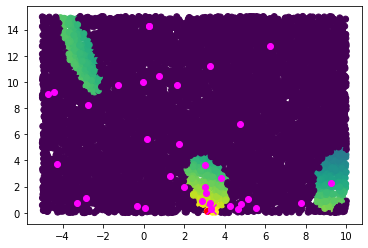

files it_3.csv
min OC 0.2847763099103986
best_value 268.78037597505863 max Y 261.54929420234515
X coordinates [3.4216716 0.2258709]


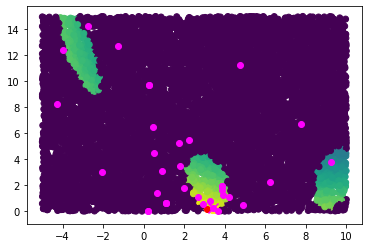

files it_27.csv
min OC 0.07530854520956609
best_value 268.78037597505863 max Y 257.1975212898745
X coordinates [3.34807482 0.4072136 ]


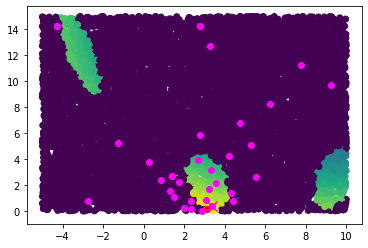

files it_21.csv
min OC 0.9052761565545779
best_value 268.78037597505863 max Y 230.5614050764509
X coordinates [3.50695487 1.27404758]


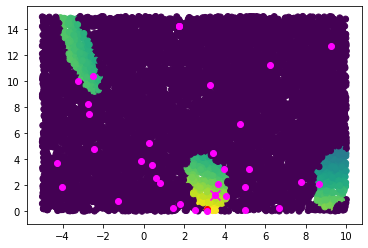

files it_9.csv
min OC 0.1208192992982049
best_value 268.78037597505863 max Y 254.1184213038892
X coordinates [3.8181372  0.30636209]


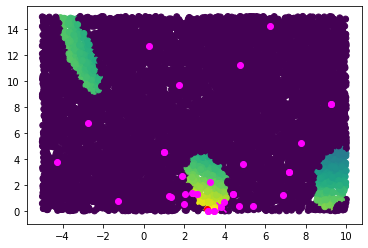

files it_16.csv
min OC 0.32101256741862016
best_value 268.78037597505863 max Y 247.4908162051531
X coordinates [3.03125527 0.89583709]


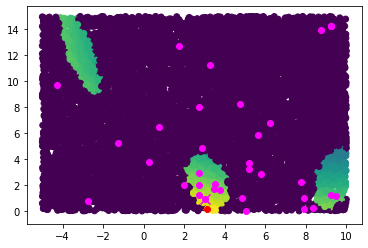

files it_25.csv
min OC 22.28197910999873
best_value 268.78037597505863 max Y 196.3783025304353
X coordinates [-3.77313531 12.41561515]


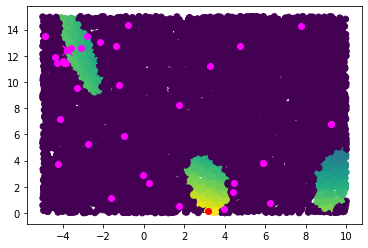

files it_20.csv
min OC 0.6026503709240387
best_value 268.78037597505863 max Y 260.07759732576113
X coordinates [3.06663247 0.43957373]


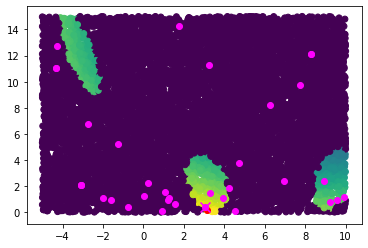

files it_30.csv
min OC 3.2730926985650513
best_value 268.78037597505863 max Y 235.96385787270856
X coordinates [2.46464114 1.61410351]


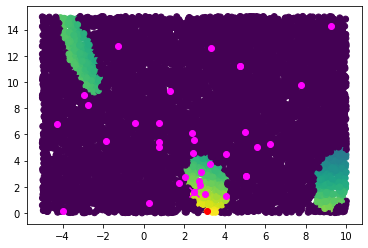

files it_38.csv
min OC 0.32471702793168333
best_value 268.78037597505863 max Y 244.23059253266968
X coordinates [2.72949829 1.16633098]


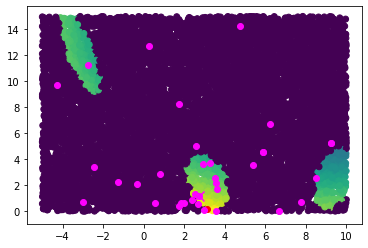

files it_7.csv
min OC 0.7397798173739716
best_value 268.78037597505863 max Y 231.1676671284174
X coordinates [3.89050917 1.07729231]


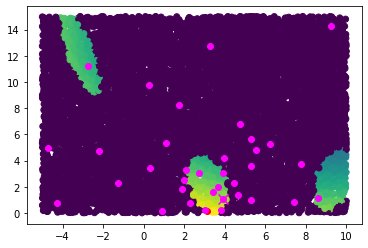

files it_32.csv
min OC 0.11880054425381559
best_value 268.78037597505863 max Y 265.41237283123087
X coordinates [3.50765925 0.05804946]


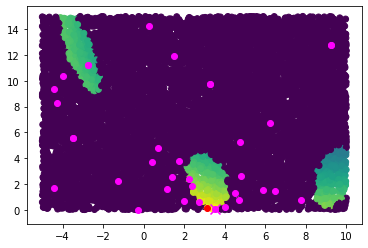

files it_11.csv
min OC 1.7660585051625617
best_value 268.78037597505863 max Y 267.01431746989607
X coordinates [3.23602651 0.12508893]


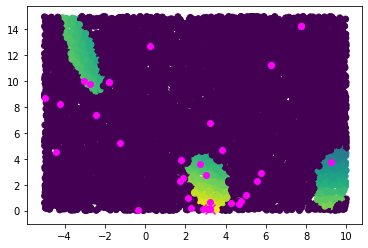

files it_18.csv
min OC 0.7674863961638039
best_value 268.78037597505863 max Y 245.93083657974938
X coordinates [2.52126632 1.21597383]


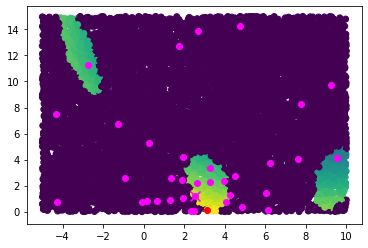

files it_35.csv
min OC 1.2731249832084472
best_value 268.78037597505863 max Y 246.0861449024503
X coordinates [2.61350027 1.16071656]


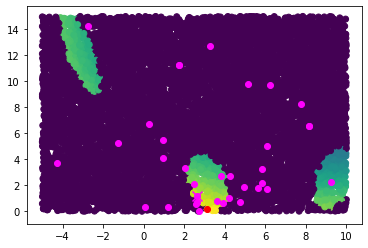

files it_29.csv
min OC 1.3204182116033394
best_value 268.78037597505863 max Y 262.5040573049151
X coordinates [2.92693338 0.42345086]


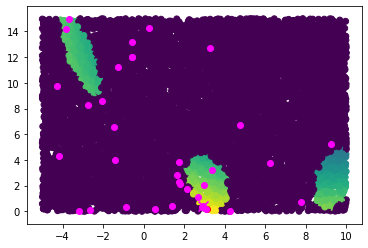

files it_12.csv
min OC 0.24919438688044693
best_value 268.78037597505863 max Y 261.9764338413862
X coordinates [3.1735264  0.32431627]


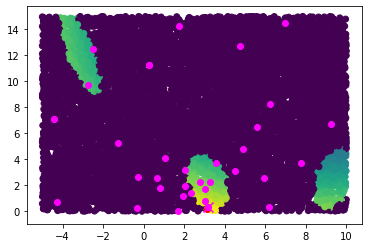

files it_6.csv
min OC 21.880917201372142
best_value 268.78037597505863 max Y 246.8994587736865
X coordinates [3.70541063 0.60286128]


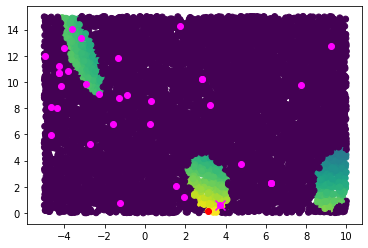

files it_31.csv
min OC 0.014547293735290623
best_value 268.78037597505863 max Y 267.5793536486674
X coordinates [3.29195604 0.08083453]


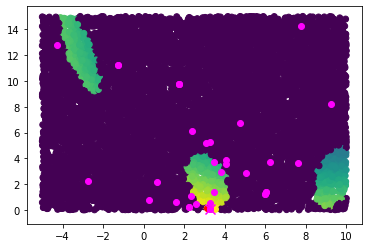

files it_5.csv
min OC 7.845252433813187
best_value 268.78037597505863 max Y 233.4144670744958
X coordinates [3.03749348 1.40080994]


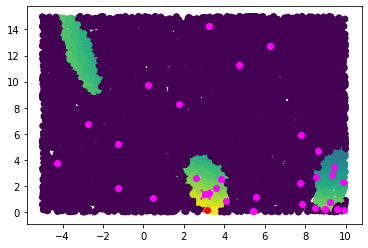

files it_34.csv
min OC 0.10898212701971488
best_value 268.78037597505863 max Y 251.0756333359974
X coordinates [3.13794367 0.7175697 ]


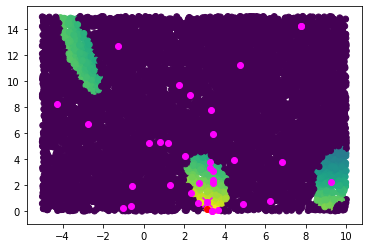

In [152]:
# X = np.random.random((10000,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])
# new_brannin_f = new_brannin(sd=1e-6)
Y = new_brannin_f.f(X)
C = new_brannin_f.c(X)
cmap = (Y*(C<0)).reshape(-1)
best_design  = X[np.argmax(cmap)]

path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_2/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    print("files", files[i])
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    

    print("min OC", np.min(best_value - np.array(cum_val).reshape(-1)))
    print("best_value",best_value, "max Y", np.max(data["Y"].values*data["C_bool"].values))
    print("X coordinates",np.array([data["X1"][np.argmax(data["Y"].values*data["C_bool"].values)],data["X2"][np.argmax(data["Y"].values*data["C_bool"].values)]]))
    plt.scatter(X[:,0],X[:,1], c=cmap)
    plt.scatter(best_design[0],best_design[1], color="red")
    plt.scatter(data["X1"].values, data["X2"].values, color="magenta")
    plt.scatter(data["X1"][np.argmax(data["Y"].values*data["C_bool"].values)],data["X2"][np.argmax(data["Y"].values*data["C_bool"].values)], color="magenta", marker="x",s=100 )
    plt.show()
    
mean_new_branin_2 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_2 = 1.95*std_values/np.sqrt(len(files))



path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_5/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_new_branin_5 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_5 = 1.95*std_values/np.sqrt(len(files))

path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_10/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_new_branin_10 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_10 = 1.95*std_values/np.sqrt(len(files))

path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_15/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_new_branin_15 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_15 = 1.95*std_values/np.sqrt(len(files))

files it_36.csv
min OC 0.2514849823041345
best_value 268.78037597505863 max Y 258.35947786623086
X coordinates [2.82846598 0.61498778]


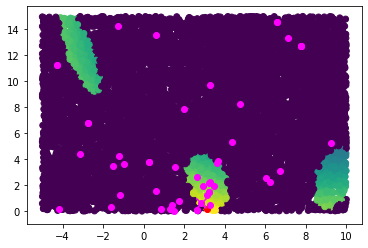

files it_17.csv
min OC 0.18474868132460642
best_value 268.78037597505863 max Y 266.47855621181566
X coordinates [3.02570038 0.24067413]


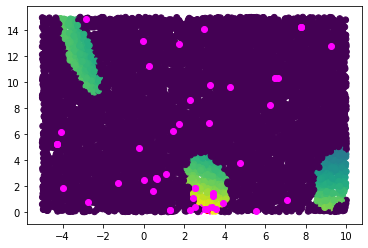

files it_22.csv
min OC 0.469344226867463
best_value 268.78037597505863 max Y 254.15947458457063
X coordinates [2.99635413 0.67839327]


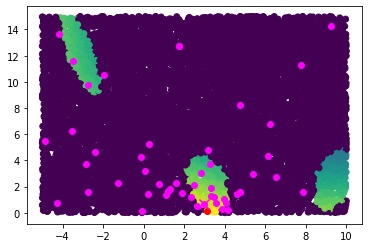

files it_23.csv
min OC 0.014334282972697565
best_value 268.78037597505863 max Y 268.26609374188973
X coordinates [3.24877699 0.0772965 ]


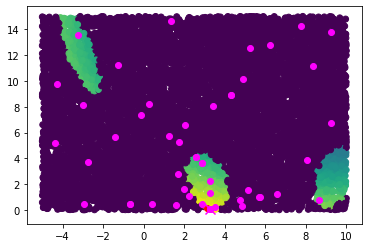

files it_4.csv
min OC 0.03883665263805369
best_value 268.78037597505863 max Y 263.7290613045274
X coordinates [3.41297182 0.15614205]


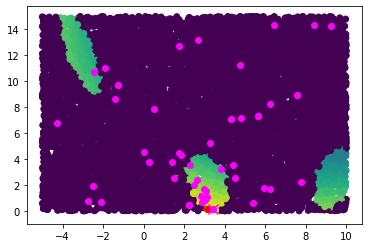

files it_2.csv
min OC 0.04136349152997809
best_value 268.78037597505863 max Y 261.85352347102025
X coordinates [3.36150837 0.24249502]


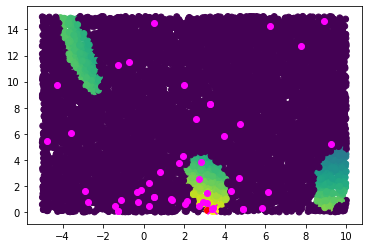

files it_1.csv
min OC 0.31300637905053463
best_value 268.78037597505863 max Y 217.9020914019828
X coordinates [4.0388782  1.49566302]


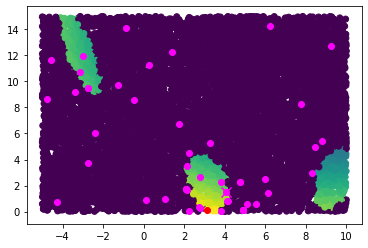

files it_15.csv
min OC 0.4325438830987878
best_value 268.78037597505863 max Y 250.45703589348338
X coordinates [2.74047796 0.93741216]


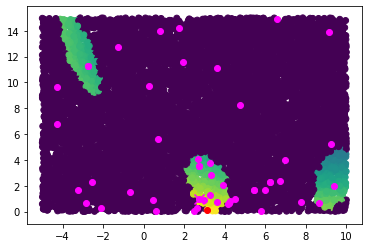

files it_24.csv
min OC 0.3713375497130187
best_value 268.78037597505863 max Y 245.88183960654945
X coordinates [3.42171325 0.7659569 ]


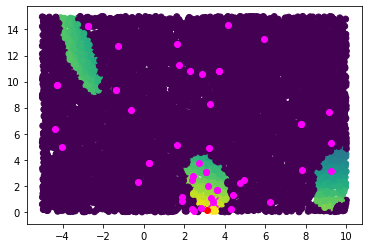

files it_39.csv
min OC 0.06356799551167569
best_value 268.78037597505863 max Y 248.6250011560063
X coordinates [3.25 0.75]


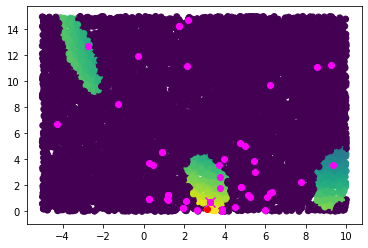

files it_26.csv
min OC 3.253006651101714
best_value 268.78037597505863 max Y 263.14803569270094
X coordinates [3.13378534 0.30295499]


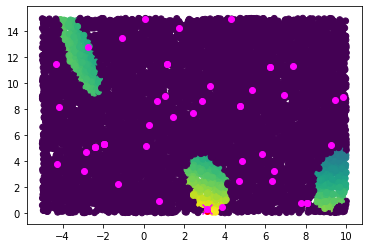

files it_10.csv
min OC 0.15089450386858516
best_value 268.78037597505863 max Y 210.15376883838107
X coordinates [9.40582553 0.51550055]


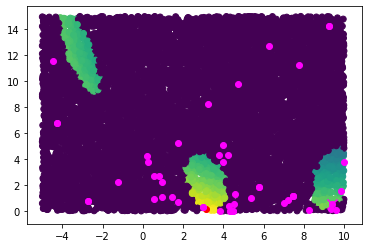

files it_8.csv
min OC 0.23511401652501718
best_value 268.78037597505863 max Y 258.69023036440046
X coordinates [2.88460392 0.57566743]


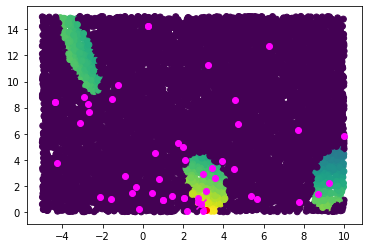

files it_28.csv
min OC 0.015148273228362541
best_value 268.78037597505863 max Y 252.37498475680957
X coordinates [3.79175866 0.37697964]


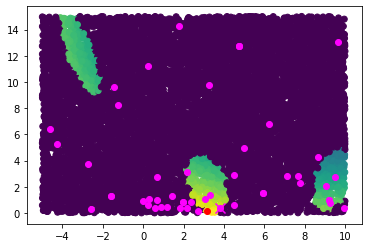

files it_27.csv
min OC 0.008902299627266075
best_value 268.78037597505863 max Y 246.70014732811143
X coordinates [2.87803291 1.00079532]


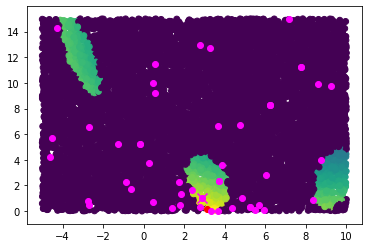

files it_21.csv
min OC 0.06745583080908091
best_value 268.78037597505863 max Y 264.0641739437846
X coordinates [3.02520976 0.32292691]


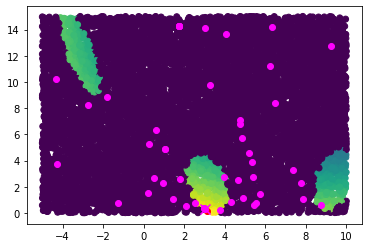

files it_9.csv
min OC 0.10917502982073302
best_value 268.78037597505863 max Y 262.62773123522754
X coordinates [3.57152973 0.1237605 ]


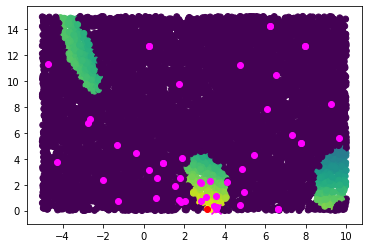

files it_16.csv
min OC 0.19838744944973996
best_value 268.78037597505863 max Y 254.46298797235409
X coordinates [3.63639832 0.37236999]


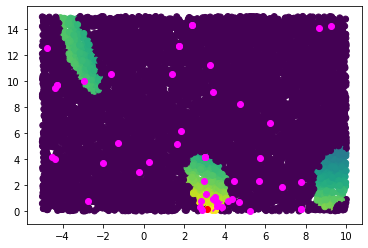

files it_25.csv
min OC -0.006096725251893531
best_value 268.78037597505863 max Y 267.7381437595129
X coordinates [3.28461039 0.07881756]


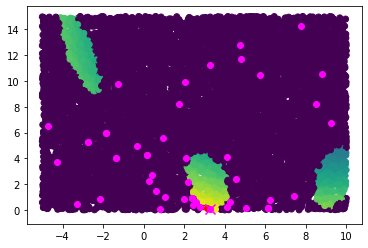

files it_20.csv
min OC 0.3145222410581141
best_value 268.78037597505863 max Y 258.6000472769208
X coordinates [3.17658229 0.43837167]


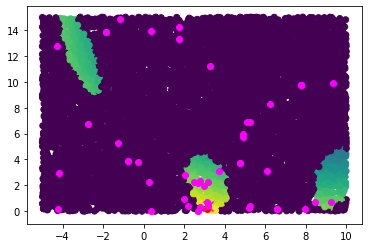

files it_30.csv
min OC 0.020360415228253714
best_value 268.78037597505863 max Y 243.29875088152664
X coordinates [2.6732633  1.22982642]


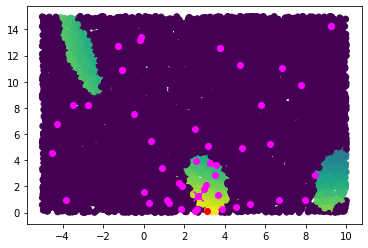

files it_38.csv
min OC 0.03422563966137204
best_value 268.78037597505863 max Y 266.4701895907237
X coordinates [3.40810969 0.06624056]


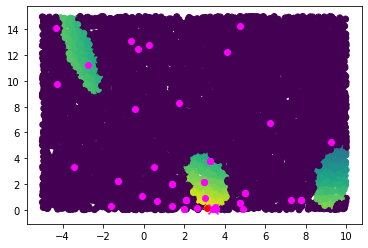

files it_7.csv
min OC 0.07675960416821681
best_value 268.78037597505863 max Y 255.3712795846793
X coordinates [3.59592491 0.35899249]


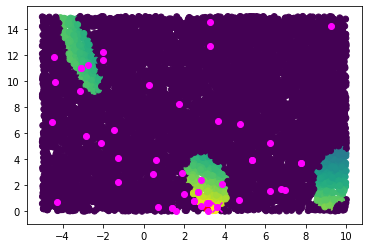

files it_19.csv
min OC 0.3663425757523555
best_value 268.78037597505863 max Y 260.94049849333743
X coordinates [3.66663114 0.13968585]


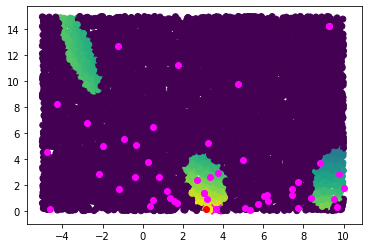

files it_32.csv
min OC 0.13673253585068323
best_value 268.78037597505863 max Y 258.5742707243715
X coordinates [3.02504973 0.51123395]


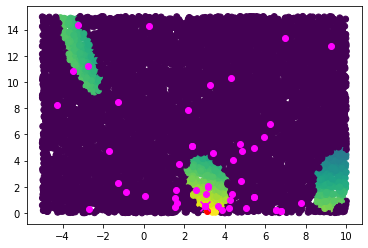

files it_18.csv
min OC 0.4495976911137518
best_value 268.78037597505863 max Y 250.66140458390285
X coordinates [3.82693576 0.42074478]


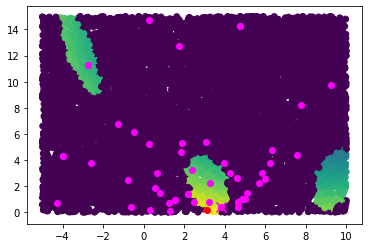

files it_35.csv
min OC 0.41018564346836683
best_value 268.78037597505863 max Y 251.40975032065342
X coordinates [3.07936567 0.7341467 ]


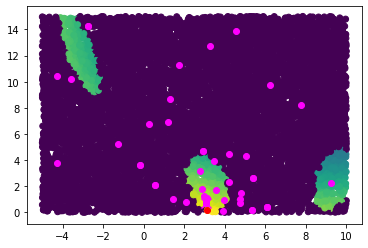

files it_12.csv
min OC 0.08131816268786451
best_value 268.78037597505863 max Y 265.5051755625824
X coordinates [3.21113065 0.18728827]


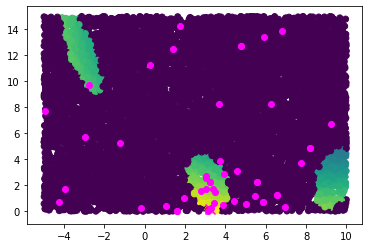

files it_6.csv
min OC 0.01759322475516001
best_value 268.78037597505863 max Y 252.97718978998998
X coordinates [3.51470325 0.4769798 ]


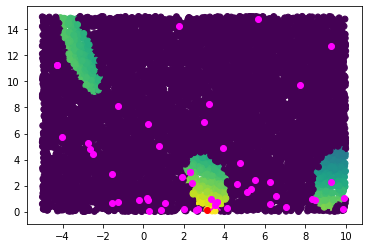

files it_13.csv
min OC 3.0391000048902015
best_value 268.78037597505863 max Y 265.74127597016843
X coordinates [3.18513118 0.19125798]


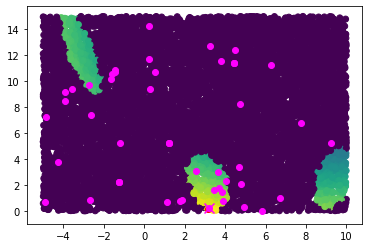

files it_31.csv
min OC 0.00838950045152842
best_value 268.78037597505863 max Y 265.51583084783607
X coordinates [3.5134143  0.05208914]


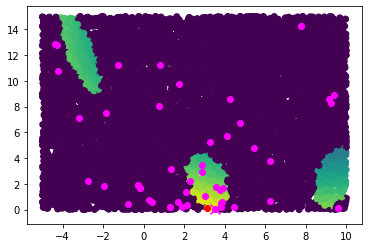

files it_33.csv
min OC 0.09706016705229104
best_value 268.78037597505863 max Y 261.31004435443293
X coordinates [3.34894005 0.26658745]


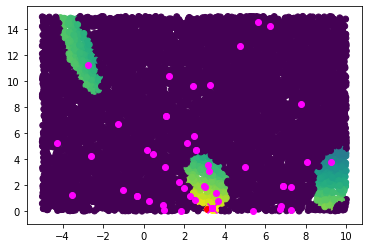

files it_0.csv
min OC 0.028072958326447406
best_value 268.78037597505863 max Y 265.7465002857112
X coordinates [3.0723236  0.24351666]


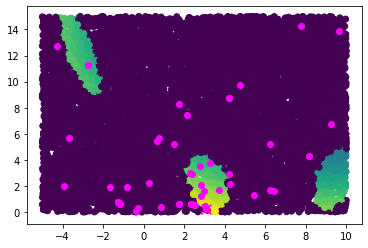

files it_5.csv
min OC 0.002010080650507007
best_value 268.78037597505863 max Y 256.61980543575487
X coordinates [3.54700195 0.33785076]


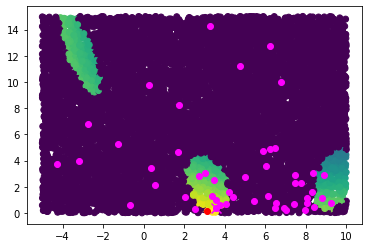

files it_34.csv
min OC 0.1052704448218833
best_value 268.78037597505863 max Y 261.38862191833266
X coordinates [3.22041956 0.32260546]


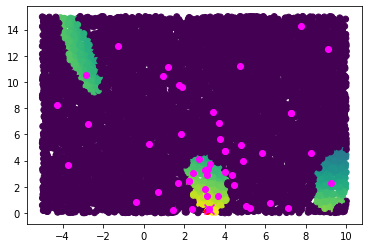

In [153]:
# X = np.random.random((10000,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])
# new_brannin_f = new_brannin(sd=1e-6)
Y = new_brannin_f.f(X)
C = new_brannin_f.c(X)
cmap = (Y*(C<0)).reshape(-1)
best_design  = X[np.argmax(cmap)]

path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_improved_search/"
files = os.listdir(path)

results_1 =[]
for i in range(len(files)):
    print("files", files[i])
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
    print("min OC", np.min(best_value - np.array(cum_val).reshape(-1)))
    print("best_value",best_value, "max Y", np.max(data["Y"].values*data["C_bool"].values))
    print("X coordinates",np.array([data["X1"][np.argmax(data["Y"].values*data["C_bool"].values)],data["X2"][np.argmax(data["Y"].values*data["C_bool"].values)]]))
    plt.scatter(X[:,0],X[:,1], c=cmap)
    plt.scatter(best_design[0],best_design[1], color="red")
    plt.scatter(data["X1"].values, data["X2"].values, color="magenta")
    plt.scatter(data["X1"][np.argmax(data["Y"].values*data["C_bool"].values)],data["X2"][np.argmax(data["Y"].values*data["C_bool"].values)], color="magenta", marker="x",s=100 )
    plt.show()
    
mean_new_branin_improved_search = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_improved_search = 1.95*std_values/np.sqrt(len(files))

No handles with labels found to put in legend.


[]

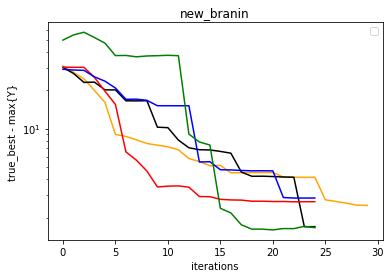

In [94]:
plt.plot(MSE_branin[10:], color="orange")

# plt.plot(mean_new_branin_2, color="black", label="2")
plt.plot(MSE_new_branin_2[10:], color="black")
# plt.plot(mean_new_branin_2-MSE_new_branin_2, color="black")

# plt.plot(mean_new_branin_5, color="red", label="5")
plt.plot(MSE_new_branin_5[10:], color = "red")
# plt.plot(mean_new_branin_5-MSE_new_branin_5, color = "red")

# plt.plot(mean_new_branin_10, color="blue", label="10")
plt.plot(MSE_new_branin_10[10:], color = "blue")
# plt.plot(mean_new_branin_10-MSE_new_branin_10, color = "blue")

# plt.plot(mean_new_branin_15, color="green", label="15")
plt.plot(MSE_new_branin_15[10:], color = "green")
# plt.plot(mean_new_branin_15-MSE_new_branin_15, color = "green")

plt.yscale("log")
plt.legend()
plt.title("new_branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
# plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC.pdf')
plt.plot()


[]

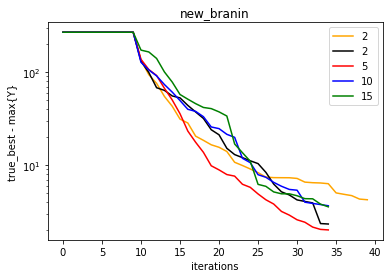

In [89]:

plt.plot(mean_values_branin, color="orange", label="2")

plt.plot(mean_new_branin_2, color="black", label="2")
# plt.plot(mean_new_branin_2+MSE_new_branin_2, color="black")
# plt.plot(mean_new_branin_2-MSE_new_branin_2, color="black")

plt.plot(mean_new_branin_5, color="red", label="5")
# plt.plot(mean_new_branin_5+MSE_new_branin_5, color = "red")
# plt.plot(mean_new_branin_5-MSE_new_branin_5, color = "red")

plt.plot(mean_new_branin_10, color="blue", label="10")
# plt.plot(mean_new_branin_10+MSE_new_branin_10, color = "blue")
# plt.plot(mean_new_branin_10-MSE_new_branin_10, color = "blue")

plt.plot(mean_new_branin_15, color="green", label="15")
# plt.plot(mean_new_branin_15+MSE_new_branin_15, color = "green")
# plt.plot(mean_new_branin_15-MSE_new_branin_15, color = "green")

plt.yscale("log")
plt.legend()
plt.title("new_branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
# plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC.pdf')
plt.plot()

## Mistery Function

In [336]:
class mistery():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 5), (0, 5)]
        else:
            self.bounds = bounds
        self.min = [(2.7450, 2.3523)]
        self.fmin = 1.1743
        self.sd = sd
        self.name = 'Mistery'

    def f(self, x, offset=-40):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = 2
        term2 = 0.01*(x2 - x1**2.0)**2.0
        term3 = (1 -  x1 )** 2
        term4 = 2*(2-x2)**2
        term5 = 7*np.sin(0.5*x1)*np.sin(0.7*x1*x2)
        fval = term1 + term2 + term3 +term4 +term5
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = -np.sin(x1 - x2 -np.pi/8.0)
        # print("fval",-fval.reshape(-1, 1))
        return -fval.reshape(n,1)


X = np.random.random((100000000,2))*5
mistery_f = mistery(sd=1e-6)
Y = mistery_f.f(X)
C = mistery_f.c(X)
best_value  = np.max(Y*(C<0))

In [340]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.95*std_values/np.sqrt(len(files))


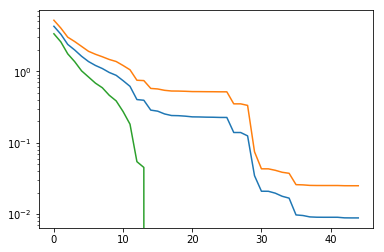

In [341]:
plt.plot(mean_values)
plt.plot(mean_values+MSE)
plt.plot(mean_values-MSE)
# plt.plot(P95)
# plt.plot(P5)
plt.yscale("log")

In [172]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery/"
files = os.listdir(path)

best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery = 1.95*std_values/np.sqrt(len(files))



# PLOTS

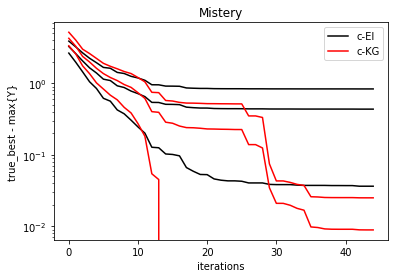

In [619]:
plt.plot(mean_values_mistery_bnch, color="black", label="c-EI")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color="black")
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color="black")

plt.plot(mean_values_mistery, color="red", label="c-KG")
plt.plot(mean_values_mistery+MSE_mistery, color = "red")
plt.plot(mean_values_mistery-MSE_mistery, color = "red")
plt.yscale("log")
plt.legend()
plt.title("Mistery")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC.pdf')
plt.plot();

# Braning Function

In [118]:
class new_brannin():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(-5, 10), (0, 15)]
        else:
            self.bounds = bounds
        self.min = [(3.26, 0.05)]
        self.fmin = 268.781
        self.sd = sd
        self.name = 'new_brannin'

    def f(self, x, offset=0):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = -(x1 - 10)**2
        term2 = -(x2 - 15)**2.0
        fval = term1 + term2
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x2 - (5.1/(4 * np.pi**2.0))*x1**2.0 + (5.0/np.pi)*x1 - 6)**2.0
        term2 = 10 * (1 - (1.0/(8*np.pi)))*np.cos(x1)
        term3 = 5
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

X = np.random.random((100000000,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])

new_brannin= new_brannin(sd=1e-6)
Y = new_brannin.f(X)
C = new_brannin.c(X)
best_value  = np.max(Y*(C<0))
print("best_value",best_value)

best_value 268.78037597505863


In [119]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1))
    
mean_values_branin_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_branin_bnch = 1.95*std_values/np.sqrt(len(files))

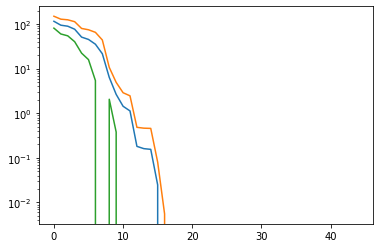

In [120]:
plt.plot(mean_values_branin_bnch)
plt.plot(mean_values_branin_bnch + MSE_branin_bnch)
plt.plot(mean_values_branin_bnch - MSE_branin_bnch)
plt.yscale("log")

In [125]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_improved_search/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_new_branin_improved_search = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_improved_search = 1.95*std_values/np.sqrt(len(files))

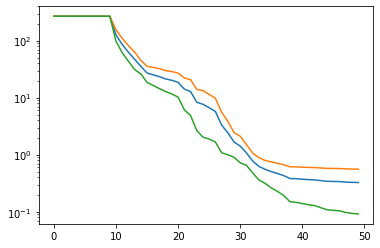

In [126]:
plt.plot(mean_new_branin_improved_search)
plt.plot(mean_new_branin_improved_search + MSE_new_branin_improved_search)
plt.plot(mean_new_branin_improved_search - MSE_new_branin_improved_search)
plt.yscale("log")

In [127]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    
    if (best_value-np.array(cum_val).reshape(-1))[-1]<100:
        results_1.append(best_value-np.array(cum_val).reshape(-1))
    
mean_values_branin = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_branin = 1.95*std_values/np.sqrt(len(files))

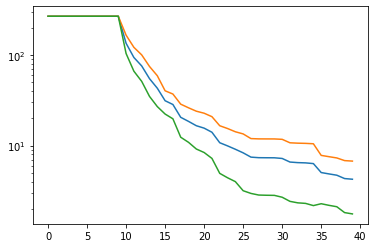

In [128]:
plt.plot(mean_values_branin)
plt.plot(mean_values_branin + MSE_branin)
plt.plot(mean_values_branin - MSE_branin)
plt.yscale("log")

# PLOTS

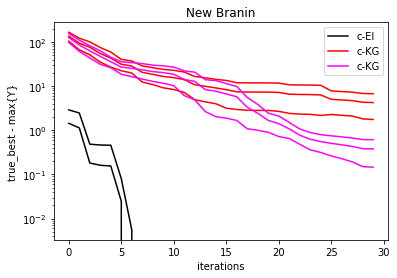

In [144]:
plt.plot(mean_values_branin_bnch[10:40], color="black", label="c-EI")
plt.plot(mean_values_branin_bnch[10:40] + MSE_branin_bnch[10:40], color="black")
plt.plot(mean_values_branin_bnch[10:40] - MSE_branin_bnch[10:40], color="black")

plt.plot(mean_values_branin[10:40], color="red", label="c-KG")
plt.plot(mean_values_branin[10:40] + MSE_branin[10:40], color = "red")
plt.plot(mean_values_branin[10:40] - MSE_branin[10:40], color = "red")

plt.plot(mean_new_branin_improved_search[10:40],color="magenta",  label="c-KG")
plt.plot(mean_new_branin_improved_search[10:40] + MSE_new_branin_improved_search[10:40],color="magenta" )
plt.plot(mean_new_branin_improved_search[10:40] - MSE_new_branin_improved_search[10:40],color="magenta")

plt.yscale("log")
plt.legend()
plt.title("New Branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
#plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/New Branin_OC.pdf')
plt.plot();

# Test Function 2

In [410]:
class test_function_2():
    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 1), (0, 1)]
        else:
            self.bounds = bounds
        self.min = [(0.2018, 0.833)]
        self.fmin = 0.748
        self.sd = sd
        self.name = 'test_function_2'

    def f(self, x, offset=0):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term2 = -(x1 - 1)**2.0
        term3 = -(x2  - 0.5 )** 2.0
        fval = term2 + term3
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)
    
    def c(self, x):
        return [self.c1(x),self.c2(x),self.c3(x)]

    def c1(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 3)**2.0
        term2 = (x2 + 2)**2.0
        term3 = -12
        fval = (term1 + term2)*np.exp(-x2**7)+term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c2(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = 10*x1 + x2 -7
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c3(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 0.5)**2.0
        term2 = (x2 - 0.5)**2.0
        term3 = -0.2
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
X = np.random.random((10000000,2))

test_function_2_f= test_function_2(sd=1e-6)
Y = test_function_2_f.f(X)
C = test_function_2_f.c(X)
C = np.concatenate(C,axis=1)
best_value  = np.max(Y.reshape(-1)*np.product(C<0,axis=1))

In [411]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_test_function_2_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_test_function_2_bnch = 1.95*std_values/np.sqrt(len(files)+100)

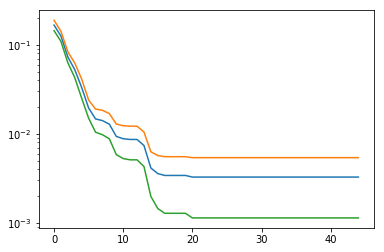

In [412]:
plt.plot(mean_test_function_2_bnch)
plt.plot(mean_test_function_2_bnch + MSE_test_function_2_bnch)
plt.plot(mean_test_function_2_bnch - MSE_test_function_2_bnch)
plt.yscale("log")

In [437]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value -  np.array(cum_val).reshape(-1))
    
mean_test_function_2 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_test_function_2 = 1.95*std_values/np.sqrt(len(files)+100)

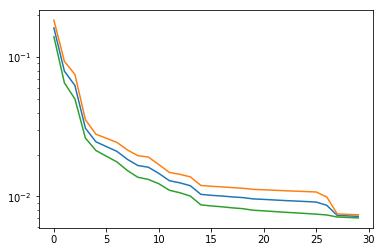

In [438]:
plt.plot(mean_test_function_2[10:])
plt.plot(mean_test_function_2[10:] + MSE_test_function_2[10:])
plt.plot(mean_test_function_2[10:] - MSE_test_function_2[10:])
plt.yscale("log")

# PLOTS

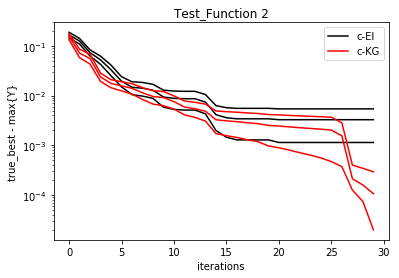

In [621]:
plt.plot(mean_test_function_2_bnch[:30], color="black", label="c-EI")
plt.plot(mean_test_function_2_bnch[:30] + MSE_test_function_2_bnch[:30], color="black")
plt.plot(mean_test_function_2_bnch[:30] - MSE_test_function_2_bnch[:30], color="black")

plt.plot(mean_test_function_2[10:]-7.1e-3, color="red", label="c-KG")
plt.plot(mean_test_function_2[10:] + MSE_test_function_2[10:]-7.1e-3, color = "red")
plt.plot(mean_test_function_2[10:] - MSE_test_function_2[10:]-7.0e-3, color = "red")
plt.yscale("log")
plt.legend()
plt.title("Test_Function 2")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/test_function_2_OC.pdf')
plt.plot();